# Teste Técnico de Engenharia de Dados

In [ ]:
% pip install mysql-connector-python

In [108]:
import pandas as pd
import mysql.connector

In [109]:
conn = mysql.connector.connect(
  host="datasprints-eng-test-db.ch1pbu8i90fi.us-east-2.rds.amazonaws.com",
  user="admin",
  password="admin123",
  database="nyctaxitrips"
)

#### Qual a distância média percorrida por viagens com no máximo 2 passageiros ?

In [110]:
pd.read_sql_query("""
SELECT AVG(trip_distance) as AvgDistance
FROM data_sprints_eng_test_ramon
WHERE passenger_count <= 2
""", conn)

,AvgDistance
0,2.68424


#### Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado?

In [111]:
df = pd.read_sql_query("""
SELECT vendor_id, SUM(total_amount) as CumulativeTotalAmount
FROM data_sprints_eng_test_ramon
GROUP BY vendor_id
ORDER BY CumulativeTotalAmount DESC
LIMIT 3
""", conn)

In [112]:
lookup_df = pd.read_csv('data-vendor_lookup-csv.csv')
df = df.replace(dict(zip(lookup_df.vendor_id, lookup_df.name)))

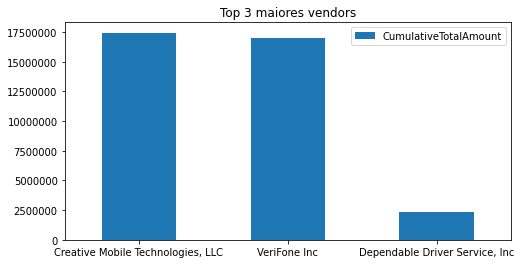

In [113]:
ax = df.plot.bar(x='vendor_id', title="Top 3 maiores vendors", rot=0, figsize=(8,4))
ax.set_xlabel("")
ax.ticklabel_format(style='plain', axis='y')   

#### Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro.

In [114]:
df = pd.read_sql_query("""
SELECT DATE_FORMAT(pickup_datetime, "%Y-%m") as Date, COUNT(*) as Count
FROM data_sprints_eng_test_ramon
WHERE LOWER(payment_type) IN ("cash", "cas", "csh")
GROUP BY DATE_FORMAT(pickup_datetime, "%Y-%m") ASC
""", conn)

Text(0.5, 0, '')

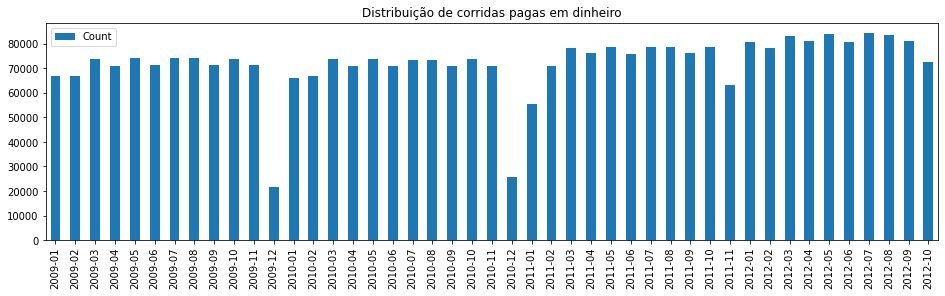

In [115]:
ax = df.plot.bar(x='Date', y='Count', figsize=(16,4), title="Distribuição de corridas pagas em dinheiro")
ax.set_xlabel("")

#### Faça um gráfico de série temporal contando a quantidade de gorjetas de cada dia, nos últimos 3 meses de 2012.

In [116]:
df = pd.read_sql_query("""
SELECT DATE_FORMAT(pickup_datetime, "%Y-%m-%d") as Date, COUNT(tip_amount) as Count
FROM data_sprints_eng_test_ramon
WHERE tip_amount > 0 AND DATE_FORMAT(pickup_datetime, "%Y-%m") >= '2012-08'
GROUP BY DATE_FORMAT(pickup_datetime, "%Y-%m-%d")
""", conn)

Text(0.5, 0, '')

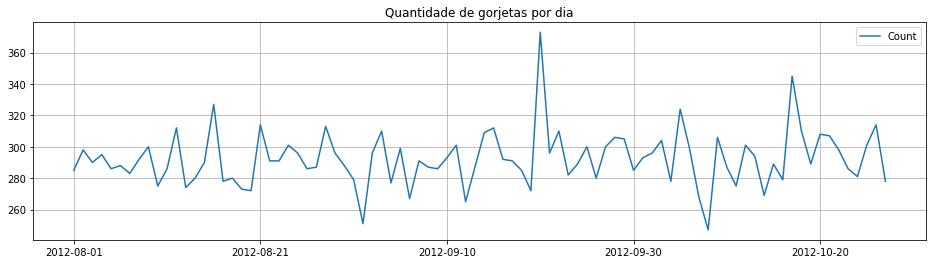

In [117]:
ax = df.plot(x='Date', figsize=(16,4), grid=True, title="Quantidade de gorjetas por dia")
ax.set_xlabel("")